#Set Up Google Drive in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Audio Normalization

In [ ]:
!pip install librosa soundfile numpy scipy

In [ ]:
import os
import librosa
import soundfile as sf
import numpy as np
import scipy.signal

In [ ]:
import os
from google.colab import drive

# 🔹 Mount Google Drive
drive.mount('/content/drive')

# 🔹 Define the correct input and output folders
input_folder = "/content/drive/MyDrive/Dataset/Audio Samples"  # Replace with your actual folder path
output_folder = "/content/drive/MyDrive/Dataset/output"  # Replace with your desired output folder

# 🔹 Create output folder if it doesn’t exist
os.makedirs(output_folder, exist_ok=True)

print(f"Input folder: {input_folder}")
print(f"Output folder: {output_folder}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Input folder: /content/drive/MyDrive/Dataset/Audio Samples
Output folder: /content/drive/MyDrive/Dataset/output


In [ ]:
def resample_audio(file_path, target_sr=16000):
    y, sr = librosa.load(file_path, sr=None, mono=True)
    if sr != target_sr:
        y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
    return y, target_sr


In [ ]:
test_file = "/content/drive/MyDrive/Dataset/Audio Samples/chittagong_10.wav"  # Change this to one of your uploaded files
y_resampled, sr_resampled = resample_audio(test_file)
print(f"Original Sample Rate: {sr_resampled}, Length: {len(y_resampled)} samples")


Original Sample Rate: 16000, Length: 56320 samples


In [ ]:
# 🔹 Function for Preprocessing
def preprocess_audio(file_path, target_sr=16000):
    y, sr = librosa.load(file_path, sr=None, mono=True)
    if sr != target_sr:
        y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
    y = y / np.max(np.abs(y))

    y, _ = librosa.effects.trim(y, top_db=20)
    return y, target_sr

for file in os.listdir(input_folder):
    if file.endswith(".wav"):
        file_path = os.path.join(input_folder, file)
        y_processed, sr_processed = preprocess_audio(file_path)

        output_file_path = os.path.join(output_folder, file)
        sf.write(output_file_path, y_processed, sr_processed)

print("Preprocessing complete! Files saved in:", output_folder)

✅ Preprocessing complete! Files saved in: /content/drive/MyDrive/Dataset/output


# Fixed Length (Padding/Resampling)

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf

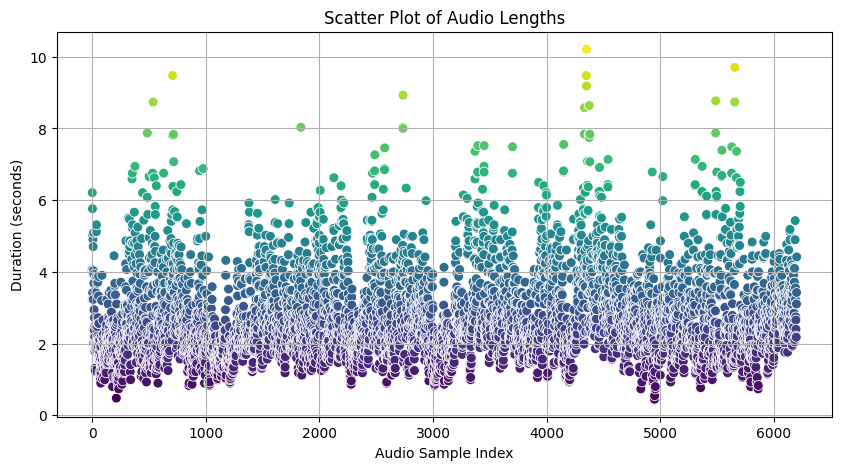

In [ ]:
audio_folder = "/content/drive/MyDrive/Dataset/Samples/Normalized"

audio_lengths = []
for file in os.listdir(audio_folder):
    if file.endswith(".wav"):
        file_path = os.path.join(audio_folder, file)
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append([file, duration])

df = pd.DataFrame(audio_lengths, columns=["Filename", "Duration"])

plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(df)), y=df["Duration"], hue=df["Duration"], palette="viridis", s=50)
plt.xlabel("Audio Sample Index")
plt.ylabel("Duration (seconds)")
plt.title("Scatter Plot of Audio Lengths")
plt.legend([],[], frameon=False)
plt.grid(True)

plt.show()

In [ ]:
print(df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]))

          Duration
count  6200.000000
mean      2.752512
std       1.200951
min       0.448000
25%       1.920000
50%       2.464000
75%       3.360000
90%       4.384000
95%       4.992000
99%       6.752000
max      10.208000


In [ ]:
input_folder = "/content/drive/MyDrive/Dataset/Samples/Normalized"
output_folder = "/content/drive/MyDrive/Dataset/Samples/Fixed Length Samples"
os.makedirs(output_folder, exist_ok=True)

fixed_length = 5
target_sr = 16000

target_samples = fixed_length * target_sr

def process_audio(file_path, output_path):
    y, sr = librosa.load(file_path, sr=target_sr)
    current_samples = len(y)

    if current_samples < target_samples:
        y = np.pad(y, (0, target_samples - current_samples), mode="constant")
        print(f"Padded: {file_path}")

    elif current_samples > target_samples:
        y = librosa.resample(y, orig_sr=sr, target_sr=int(sr * (target_samples / current_samples)))
        print(f"Resampled: {file_path}")
    sf.write(output_path, y, target_sr)

for file in os.listdir(input_folder):
    if file.endswith(".wav"):
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file)
        process_audio(input_path, output_path)

print("Audio processing complete! Files saved in:", output_folder)


Streaming output truncated to the last 5000 lines.
Padded: /content/drive/MyDrive/Dataset/Normalized/noise_noakhali_60.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/pitch_noakhali_60.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/stretch_noakhali_60.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/noise_noakhali_61.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/pitch_noakhali_61.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/stretch_noakhali_61.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/noise_noakhali_62.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/pitch_noakhali_62.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/stretch_noakhali_62.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/noise_noakhali_63.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/pitch_noakhali_63.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/stretch_noakhali_63.wav
Padded: /content/drive/MyDrive/Dataset/Normalized/noise_noakhali_64.wav
Padde

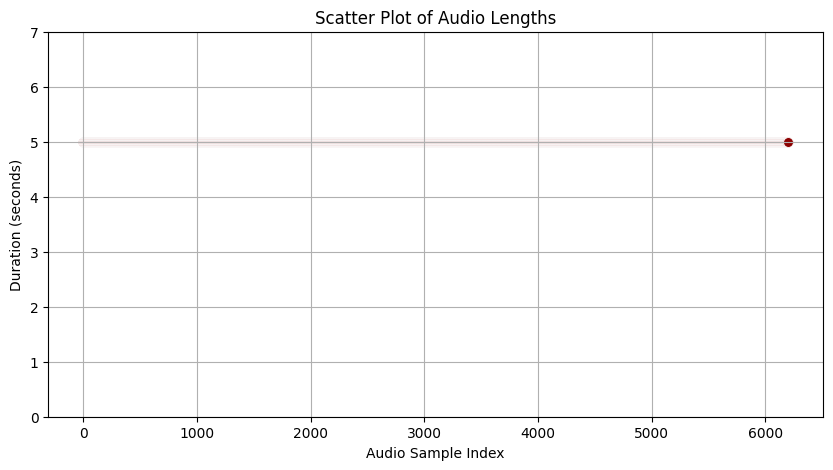

In [ ]:
audio_folder = "/content/drive/MyDrive/Dataset/Samples/Fixed Length Samples"

audio_lengths = []
for file in os.listdir(audio_folder):
    if file.endswith(".wav"):
        file_path = os.path.join(audio_folder, file)
        y, sr = librosa.load(file_path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append([file, duration])

df = pd.DataFrame(audio_lengths, columns=["Filename", "Duration"])

plt.figure(figsize=(10, 5))
sns.scatterplot(x=range(len(df)), y=df["Duration"], color='darkred', s=50)
plt.ylim(0, 7)
plt.xlabel("Audio Sample Index")
plt.ylabel("Duration (seconds)")
plt.title("Scatter Plot of Audio Lengths")
plt.legend([],[], frameon=False)
plt.grid(True)

plt.show()

In [ ]:
print(df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]))

          Duration
count  6200.000000
mean      4.999992
std       0.000044
min       4.999375
25%       5.000000
50%       5.000000
75%       5.000000
90%       5.000000
95%       5.000000
99%       5.000000
max       5.000000


#Data Augmentation

In [ ]:
import os

drive_base = "/content/drive/My Drive/Dataset/Noakhali/"
input_folder = os.path.join(drive_base, "/content/drive/MyDrive/Dataset/Noakhali/Noakhali Audio Samples/")
output_folder = os.path.join(drive_base, "/content/drive/MyDrive/Dataset/Noakhali/Noakhali augmented/")
csv_file = os.path.join(drive_base, "/content/drive/MyDrive/Dataset/Noakhali/Noakhali Train Translation.csv")
output_csv = os.path.join(drive_base, "/content/drive/MyDrive/Dataset/Noakhali/Noakhali Augmented transcription.csv")

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import soundfile as sf

os.makedirs(output_folder, exist_ok=True)
df = pd.read_csv(csv_file)

def add_noise(y, noise_level=0.005):
    noise = noise_level * np.random.randn(len(y))
    return y + noise

def pitch_shift(y, sr, n_steps=2):
    return librosa.effects.pitch_shift(y=y, sr=sr, n_steps=n_steps)

def time_stretch(y, rate=0.9):
    return librosa.effects.time_stretch(y=y, rate=rate)

augmentations = {
    "noise": add_noise,
    "pitch": lambda y, sr: pitch_shift(y, sr, n_steps=2),
    "stretch": time_stretch
}

augmented_data = []

for index, row in df.iterrows():
    filename = row["file_name"]
    transcription = row["noakhali_bangla_speech"]
    bangla_transcription = row["bangla_speech"]
    english_transcription = row["english_speech"]
    region_name = row["region_name"]

    file_path = os.path.join(input_folder, filename)
    if not os.path.exists(file_path):
        print(f"Warning: {file_path} not found.")
        continue

    y, sr = librosa.load(file_path, sr=None)
    augmented_data.append([filename, transcription, bangla_transcription, english_transcription, region_name])

    for aug_name, aug_function in augmentations.items():
        try:
            if aug_name == "pitch":
                augmented_audio = aug_function(y, sr)
            else:
                augmented_audio = aug_function(y)

            aug_filename = f"{aug_name}_{filename}"
            aug_file_path = os.path.join(output_folder, aug_filename)

            sf.write(aug_file_path, augmented_audio, sr)

            augmented_data.append([aug_filename, transcription, bangla_transcription, english_transcription, region_name])

        except Exception as e:
            print(f"Error processing {filename} with {aug_name}: {e}")

aug_df = pd.DataFrame(augmented_data, columns=["filename", "noakhali_bangla_speech", "bangla_speech", "english_speech", "region_name"])

aug_df.to_csv(output_csv, index=False, encoding="utf-8")

print(f"Augmentation complete! Updated CSV saved as: {output_csv}")


✅ Augmentation complete! Updated CSV saved as: /content/drive/MyDrive/Dataset/Noakhali/Noakhali Augmented transcription.csv


#Data Split

In [ ]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
from multiprocessing import Pool

csv_file = "/content/drive/MyDrive/Dataset/Transcriptions.csv"
raw_audio_folder = "/content/drive/MyDrive/Dataset/Samples/Normalized"
mfcc_folder = "/content/drive/MyDrive/Dataset/Samples/MFCC(Variable)"
mel_folder = "/content/drive/MyDrive/Dataset/Samples/MelSpectogram(Variable)"

output_base = "/content/drive/MyDrive/Dataset/Split2"
train_audio_folder = os.path.join(output_base, "train/Audio")
val_audio_folder = os.path.join(output_base, "val/Audio")
test_audio_folder = os.path.join(output_base, "test/Audio")
train_mfcc_folder = os.path.join(output_base, "train/MFCC")
val_mfcc_folder = os.path.join(output_base, "val/MFCC")
test_mfcc_folder = os.path.join(output_base, "test/MFCC")
train_mel_folder = os.path.join(output_base, "train/Melspectrogram")
val_mel_folder = os.path.join(output_base, "val/Melspectrogram")
test_mel_folder = os.path.join(output_base, "test/Melspectrogram")

for folder in [train_audio_folder, val_audio_folder, test_audio_folder,
               train_mfcc_folder, val_mfcc_folder, test_mfcc_folder,
               train_mel_folder, val_mel_folder, test_mel_folder]:
    os.makedirs(folder, exist_ok=True)

df = pd.read_csv(csv_file)

train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df["region"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["region"], random_state=42)

def copy_file(args):
    src_folder, dest_folder, filename, file_ext = args
    src_path = os.path.join(src_folder, filename.replace(".wav", file_ext))
    dest_path = os.path.join(dest_folder, filename.replace(".wav", file_ext))
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)
    else:
        print(f"Warning: {src_path} not found")

def copy_files_parallel(file_list, src_folder, dest_folder, file_ext):
    with Pool(processes=os.cpu_count()) as pool:
        pool.map(copy_file, [(src_folder, dest_folder, file, file_ext) for file in file_list])

copy_files_parallel(train_df["filename"], raw_audio_folder, train_audio_folder, ".wav")
copy_files_parallel(val_df["filename"], raw_audio_folder, val_audio_folder, ".wav")
copy_files_parallel(test_df["filename"], raw_audio_folder, test_audio_folder, ".wav")

copy_files_parallel(train_df["filename"], mfcc_folder, train_mfcc_folder, ".npy")
copy_files_parallel(val_df["filename"], mfcc_folder, val_mfcc_folder, ".npy")
copy_files_parallel(test_df["filename"], mfcc_folder, test_mfcc_folder, ".npy")

copy_files_parallel(train_df["filename"], mel_folder, train_mel_folder, ".png")
copy_files_parallel(val_df["filename"], mel_folder, val_mel_folder, ".png")
copy_files_parallel(test_df["filename"], mel_folder, test_mel_folder, ".png")

print("Data split complete! Train, Validation, and Test sets saved.")

Data split complete! Train, Validation, and Test sets saved.


In [ ]:
os.makedirs(output_base, exist_ok=True)
df = pd.read_csv(csv_file)

train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df["region"], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df["region"], random_state=42)

train_df.to_csv(f"{output_base}/train.csv", index=False)
val_df.to_csv(f"{output_base}/val.csv", index=False)
test_df.to_csv(f"{output_base}/test.csv", index=False)

print("CSV split complete! Train, Validation, and Test transcriptions saved.")


CSV split complete! Train, Validation, and Test transcriptions saved.


#Install Required Libraries

In [ ]:
!pip install transformers datasets torchaudio librosa torch accelerate soundfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import time
import pandas as pd
import torchaudio
import librosa
import torch
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from transformers import WhisperTokenizer, WhisperProcessor, WhisperFeatureExtractor, WhisperForConditionalGeneration

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Data Preprocess

In [ ]:
label_file = "/content/drive/My Drive/Dataset/Split/train/train.csv"
labels_df = pd.read_csv(label_file)
audio_folder = "/content/drive/My Drive/Dataset/Split/train/Audio"

val_labels_df = pd.read_csv("/content/drive/My Drive/Dataset/Split/val/val.csv")
val_audio_folder = "/content/drive/My Drive/Dataset/Split/val/Audio"

In [ ]:
model_path = "bangla-speech-processing/BanglaASR"
processor = WhisperProcessor.from_pretrained(model_path)
model = WhisperForConditionalGeneration.from_pretrained(model_path).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

In [ ]:
save_dir = "/content/drive/My Drive/Dataset/BanglaASRStuff/Preprocessed_BanglaASR" #for saving train dataset class
save_dir_val = "/content/drive/My Drive/Dataset/BanglaASRStuff/Preprocessed_BanglaASR_val" #for saving val dataset class

In [ ]:
class BanglaSpeechDataset(Dataset):
    def __init__(self, audio_folder, labels_df, processor, preprocessed_data_path=None, max_length=448):
        self.audio_folder = audio_folder
        self.labels_df = labels_df
        self.processor = processor
        self.max_length = max_length
        self.preprocessed_data_path = preprocessed_data_path


        if self.preprocessed_data_path and os.path.exists(self.preprocessed_data_path):
            print(f"Loading preprocessed data from {self.preprocessed_data_path}")
            self.preprocessed_data = self._load_preprocessed_data()
        else:
            print(f"Preprocessed data not found. Starting preprocessing.")
            self.preprocessed_data = self.preprocess_data()

    def _load_preprocessed_data(self):
        preprocessed_data = []
        for filename in os.listdir(self.preprocessed_data_path):
            file_path = os.path.join(self.preprocessed_data_path, filename)
            print(file_path)
            if os.path.isfile(file_path):  # Only load files, not directories
                data = torch.load(file_path)  # Load dictionary

                # Extract actual tensors
                input_features = data["input_features"]
                labels = data["labels"]

                preprocessed_data.append((input_features, labels))

        print(f"Loaded {len(preprocessed_data)} preprocessed files.")
        return preprocessed_data


    def preprocess_data(self):
        if not os.path.exists(self.preprocessed_data_path):
            os.makedirs(self.preprocessed_data_path)

        preprocessed_data = []

        for idx in range(len(self.labels_df)):
            audio_filename = self.labels_df.iloc[idx]['filename']
            audio_path = os.path.join(self.audio_folder, audio_filename)
            print(audio_path)
            waveform, sampling_rate = torchaudio.load(audio_path)

            if sampling_rate != 16000:
                waveform = librosa.resample(waveform.numpy(), orig_sr=sampling_rate, target_sr=16000)
                waveform = torch.tensor(waveform)

            input_features = self.processor.feature_extractor(waveform.squeeze(0), sampling_rate=16000, return_tensors="pt").input_features.squeeze(0)

            transcription = self.labels_df.iloc[idx]['accented_bangla_speech']
            labels = self.processor.tokenizer(transcription, padding="max_length", max_length=self.max_length, return_tensors="pt").input_ids.squeeze(0)

            preprocessed_data.append({"input_features": input_features, "labels": labels})

        # Save preprocessed data to Google Drive so that we can load it faster than processing it again
        if self.preprocessed_data_path:
            for i, sample in enumerate(preprocessed_data):
                torch.save(sample, os.path.join(self.preprocessed_data_path, f"sample_{i}.pt"))
            print(f"Preprocessed data saved to {self.preprocessed_data_path}")

        return preprocessed_data

    def __len__(self):
        return len(self.preprocessed_data)

    def __getitem__(self, idx):
        input_features, labels = self.preprocessed_data[idx]
        return input_features, labels


In [ ]:
class BanglaSpeechDatasetVal(Dataset):
    def __init__(self, audio_folder, labels_df, processor, preprocessed_data_path=None, max_length=448):
        self.audio_folder = audio_folder
        self.labels_df = labels_df
        self.processor = processor
        self.max_length = max_length
        self.preprocessed_data_path = preprocessed_data_path
        if self.preprocessed_data_path and os.path.exists(self.preprocessed_data_path):
            print(f"Loading preprocessed data from {self.preprocessed_data_path}")
            self.preprocessed_data = self._load_preprocessed_data()
        else:
            print(f"Preprocessed data not found. Starting preprocessing.")
            self.preprocessed_data = self.preprocess_data()
    def _load_preprocessed_data(self):
        preprocessed_data = []
        for filename in os.listdir(self.preprocessed_data_path):
            file_path = os.path.join(self.preprocessed_data_path, filename)
            print(file_path)
            if os.path.isfile(file_path):  # Only load files, not directories
                data = torch.load(file_path)  # Load dictionary

                input_features = data["input_features"]
                labels = data["labels"]
                preprocessed_data.append((input_features, labels))
        print(f"Loaded {len(preprocessed_data)} preprocessed files.")
        return preprocessed_data
    def preprocess_data(self):

        if not os.path.exists(self.preprocessed_data_path):
            os.makedirs(self.preprocessed_data_path)

        preprocessed_data = []
        for idx in range(len(self.labels_df)):
            audio_filename = self.labels_df.iloc[idx]['filename']
            audio_path = os.path.join(self.audio_folder, audio_filename)
            print(audio_path)
            waveform, sampling_rate = torchaudio.load(audio_path)

            if sampling_rate != 16000:
                waveform = librosa.resample(waveform.numpy(), orig_sr=sampling_rate, target_sr=16000)
                waveform = torch.tensor(waveform)

            input_features = self.processor.feature_extractor(waveform.squeeze(0), sampling_rate=16000, return_tensors="pt").input_features.squeeze(0)

            transcription = self.labels_df.iloc[idx]['accented_bangla_speech']
            labels = self.processor.tokenizer(transcription, padding="max_length", max_length=self.max_length, return_tensors="pt").input_ids.squeeze(0)
            preprocessed_data.append({"input_features": input_features, "labels": labels})

        if self.preprocessed_data_path:
            for i, sample in enumerate(preprocessed_data):
                torch.save(sample, os.path.join(self.preprocessed_data_path, f"sample_{i}.pt"))
            print(f"Preprocessed data saved to {self.preprocessed_data_path}")
        return preprocessed_data
    def __len__(self):
        return len(self.preprocessed_data)
    def __getitem__(self, idx):
        input_features, labels = self.preprocessed_data[idx]
        return input_features, labels

In [ ]:
def collate_batch(batch):
    features, labels = zip(*batch)

    features_padded = torch.stack(features)
    labels_padded = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value=processor.tokenizer.pad_token_id)

    return features_padded.to("cuda"), labels_padded.to("cuda")

In [ ]:
print(f"Using device: {device}")

Using device: cuda


In [ ]:
dataset = BanglaSpeechDataset(audio_folder, labels_df, processor, save_dir)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=collate_batch)

#for validation
val_dataset = BanglaSpeechDatasetVal(val_audio_folder, val_labels_df, processor, save_dir_val)
val_dataloader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=collate_batch)

#dataloader shuffle=false for testing purposes
#so that i can see if any changes are occuring after passing collate_batch function or not# Loop through the dataset to inspect a sample
#yes the tensor stays the same
#38mins lagse to save dataset files
#now after adding preload processed file in dataset class def it took 3mins

#Data preprocessing debug test codes

In [ ]:
sample = torch.load("/content/drive/My Drive/Dataset/Preprocessed_BanglaASR/sample_0.pt")
print(sample)  # Should print a dictionary with tensors

In [ ]:
print(dataset.preprocessed_data)

In [ ]:
for i, (input_features, label_seq) in enumerate(dataset):
    print(f"Sample {i}:")
    print(f"Input Features Shape: {input_features.shape}")
    print(f"Input Features Tensor: {input_features}")  # Display the actual tenso

    # Decode the label sequence back to text
    label_text = processor.tokenizer.decode(label_seq.tolist(), skip_special_tokens=True)
    print(f"Label Sequence Shape: {label_seq.shape}")
    print(f"Label Sequence Tensor: {label_seq}")  # Display the raw tensor
    print(f"Label Sequence (Decoded): {label_text}")

    print("-" * 50)

    if i == 2:  # Only show 3 samples for inspection
        break
#chittagong_266.wav
#তুঁই আর আঁর নাই ইয়ান মানি লত ন ফারির

#noise_noakhali_236.wav
#তুমি তোমার মাইয়া রে লই বেস্ত সময় পার কইত্তে আসো

#noakhali_254.wav
#অন কতা অইল আই হত্তেক মাসে কাবিনের টেয়া দি দিয়াম

#i think it is loading the data properly since it is able to decode it perfectly.
#this was in past,but no way to know which audiofile tensor it is

In [ ]:
# Iterate through the dataloader and print the batches
for batch_idx, (features, labels) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}:")

    # Print the shape of features and labels in the batch
    print(f"Features shape: {features.shape}")
    print(f"Labels shape: {labels.shape}")

    # Optionally, print the actual data for a specific batch (for debugging purposes)
    print(f"First feature in batch (Tensor): {features[0]}")
    print(f"First label in batch (Tensor): {labels[0]}")

    # Decode the first label tensor to text (if you want to see it in human-readable form)
    decoded_label = processor.tokenizer.decode(labels[0].tolist(), skip_special_tokens=True)
    print(f"First label (Decoded): {decoded_label}")

    # To avoid printing too many batches, break after the first one for a quick check
    if batch_idx == 0:
        break


In [ ]:
#Graph code : frequency vs sequence length
def plot_and_save_raw_sequence_length_distribution(audio_folder, labels_df, processor, save_path):
    input_lengths = []  # Store sequence lengths before padding

    for idx in range(len(labels_df)):
        # Load audio file
        audio_filename = labels_df.iloc[idx]['filename']
        audio_path = os.path.join(audio_folder, audio_filename)
        waveform, sampling_rate = torchaudio.load(audio_path)

        # Resample if necessary
        if sampling_rate != 16000:
            waveform = librosa.resample(waveform.numpy(), orig_sr=sampling_rate, target_sr=16000)
            waveform = torch.tensor(waveform)

        # Extract features using WhisperProcessor
        input_features = processor.feature_extractor(
            waveform.squeeze(0), sampling_rate=16000, return_tensors="pt"
        ).input_features.squeeze(0)  # Shape: (num_mel_bins, sequence_length)

        # Store the sequence length (second dimension)
        input_lengths.append(input_features.shape[1])

    # Save the input_lengths to Google Drive (or any path you specify)
    if save_path:
        with open(save_path, 'w') as f:
            for length in input_lengths:
                f.write(f"{length}\n")
        print(f"Saved input lengths to {save_path}")
    #in saving the file only the input lenght will be saved. No need to save which file.
    #This is because the order of loading files is same for now.
    #unless i change the parameter like making a list (audio_files = sorted(os.listdir(audio_folder))) and running that list

    # Plot the distribution of input lengths
    plt.figure(figsize=(10, 6))
    plt.hist(input_lengths, bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Sequence Lengths (Unpadded)', fontsize=14)
    plt.xlabel('Sequence Length', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

# Example Usage:
# Define the path to save the input lengths in your Google Drive
save_path = "/content/drive/My Drive/Dataset/Preprocessed_BanglaASR_other/sequence_lengths.txt"

# Call the function to compute, plot, and save the input lengths
plot_and_save_raw_sequence_length_distribution(audio_folder, labels_df, processor, save_path)

#51min dhore cholse, stopped it. need to see where is the issue.
#is it running infinitley naki is it actually taking time

#Model train + validation

In [ ]:
checkpoint = torch.load(checkpoint_path)

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
scaler.load_state_dict(checkpoint['scaler_state_dict'])

epoch = checkpoint['epoch']

model.to(device)

print(f"Checkpoint loaded successfully, resuming from epoch {epoch}.")


In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
from torch.cuda.amp import autocast, GradScaler

optimizer = optim.Adam(model.parameters(), lr=1e-5)
scaler = GradScaler()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


save_loss_accuracy_path = "/content/drive/My Drive/Dataset/BanglaASRStuff/Preprocessed_BanglaASR_other/training_loss_accuracy_data.npy"


num_epochs = 2
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0
    start_time = time.time()


    for batch_idx, (input_features, labels) in enumerate(dataloader):
        optimizer.zero_grad()
        input_features = input_features.to(device)
        labels = labels.to(device).to(torch.long)

        with autocast():
            outputs = model(input_features=input_features, labels=labels)
            loss = outputs.loss

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item()

        predicted = outputs.logits.argmax(dim=-1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.numel()

        if batch_idx % 100 == 0:
            elapsed_time = time.time() - start_time
            remaining_time = elapsed_time * (len(dataloader) - batch_idx) / (batch_idx + 1)
            print(f"Epoch {epoch+1}/{num_epochs}: {100 * batch_idx / len(dataloader):.1f}% "
                  f"| {batch_idx+1}/{len(dataloader)} "
                  f"[{elapsed_time // 60:.0f}m {elapsed_time % 60:.0f}s < "
                  f"{remaining_time // 60:.0f}m {remaining_time % 60:.0f}s left] "
                  f"| Loss: {loss.item():.4f} | Train Acc: {100 * correct_train / total_train:.2f}%")

    avg_train_loss = train_loss / len(dataloader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch_idx, (input_features, labels) in enumerate(val_dataloader):
            input_features = input_features.to(device)
            labels = labels.to(device).to(torch.long)


            with autocast():
                outputs = model(input_features=input_features, labels=labels)
                loss = outputs.loss

            val_loss += loss.item()

            predicted = outputs.logits.argmax(dim=-1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.numel()


    avg_val_loss = val_loss / len(val_dataloader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    # Save loss and accuracy data
    np.save(save_loss_accuracy_path, {
        "train_losses": np.array(train_losses),
        "val_losses": np.array(val_losses),
        "train_accuracies": np.array(train_accuracies),
        "val_accuracies": np.array(val_accuracies),
    })


<ipython-input-24-e645b08ec4b6>:10: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-24-e645b08ec4b6>:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/2: 0.0% | 1/2480  0s < 19m 22s left] | Loss: 0.0063 | Train Acc: 99.89%
Epoch 1/2: 4.0% | 101/2480  37s < 14m 31s left] | Loss: 0.0002 | Train Acc: 99.82%
Epoch 1/2: 8.1% | 201/2480  14s < 14m 1s left] | Loss: 0.0129 | Train Acc: 99.82%
Epoch 1/2: 12.1% | 301/2480  51s < 13m 24s left] | Loss: 0.0036 | Train Acc: 99.80%
Epoch 1/2: 16.1% | 401/2480  28s < 12m 48s left] | Loss: 0.0094 | Train Acc: 99.80%
Epoch 1/2: 20.2% | 501/2480  5s < 12m 11s left] | Loss: 0.0096 | Train Acc: 99.79%
Epoch 1/2: 24.2% | 601/2480  42s < 11m 35s left] | Loss: 0.0048 | Train Acc: 99.78%
Epoch 1/2: 28.2% | 701/2480  19s < 10m 58s left] | Loss: 0.0089 | Train Acc: 99.79%
Epoch 1/2: 32.3% | 801/2480  56s < 10m 21s left] | Loss: 0.0064 | Train Acc: 99.79%
Epoch 1/2: 36.3% | 901/2480  33s < 9m 44s left] | Loss: 0.0033 | Train Acc: 99.79%
Epoch 1/2: 40.3% | 1001/2480  10s < 9m 7s left] | Loss: 0.0118 | Train Acc: 99.80%
Epoch 1/2: 44.4% | 1101/2480  47s < 8m 30s left] | Loss: 0.0051 | Train Acc: 99.80%
Ep

<ipython-input-24-e645b08ec4b6>:81: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/2 - Val Loss: 0.0129 | Val Acc: 99.61%
Epoch 2/2: 0.0% | 1/2480  0s < 15m 2s left] | Loss: 0.0022 | Train Acc: 99.89%
Epoch 2/2: 4.0% | 101/2480  37s < 14m 42s left] | Loss: 0.0077 | Train Acc: 99.90%
Epoch 2/2: 8.1% | 201/2480  14s < 14m 2s left] | Loss: 0.0067 | Train Acc: 99.91%
Epoch 2/2: 12.1% | 301/2480  51s < 13m 24s left] | Loss: 0.0030 | Train Acc: 99.91%
Epoch 2/2: 16.1% | 401/2480  28s < 12m 47s left] | Loss: 0.0166 | Train Acc: 99.90%
Epoch 2/2: 20.2% | 501/2480  5s < 12m 11s left] | Loss: 0.0098 | Train Acc: 99.90%
Epoch 2/2: 24.2% | 601/2480  42s < 11m 34s left] | Loss: 0.0001 | Train Acc: 99.89%
Epoch 2/2: 28.2% | 701/2480  19s < 10m 57s left] | Loss: 0.0159 | Train Acc: 99.88%
Epoch 2/2: 32.3% | 801/2480  55s < 10m 19s left] | Loss: 0.0029 | Train Acc: 99.87%
Epoch 2/2: 36.3% | 901/2480  32s < 9m 42s left] | Loss: 0.0013 | Train Acc: 99.87%
Epoch 2/2: 40.3% | 1001/2480  9s < 9m 6s left] | Loss: 0.0036 | Train Acc: 99.87%
Epoch 2/2: 44.4% | 1101/2480  46s < 8m 29

In [ ]:
checkpoint_path = "/content/drive/My Drive/Dataset/Models/Preprocessed_BanglaASR/checkpoint_bangla_asr.pth"

os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

torch.save({
    'epoch': epoch + 1,
    'model_state_dict': model.state_dict(),  # Save model weights
    'optimizer_state_dict': optimizer.state_dict(),  # Save optimizer state
    'scaler_state_dict': scaler.state_dict(),  # Save scaler state for mixed precision
}, checkpoint_path)

print(f"Checkpoint saved at {checkpoint_path}")


Checkpoint saved at /content/drive/My Drive/Dataset/Models/Preprocessed_BanglaASR/checkpoint_bangla_asr.pth


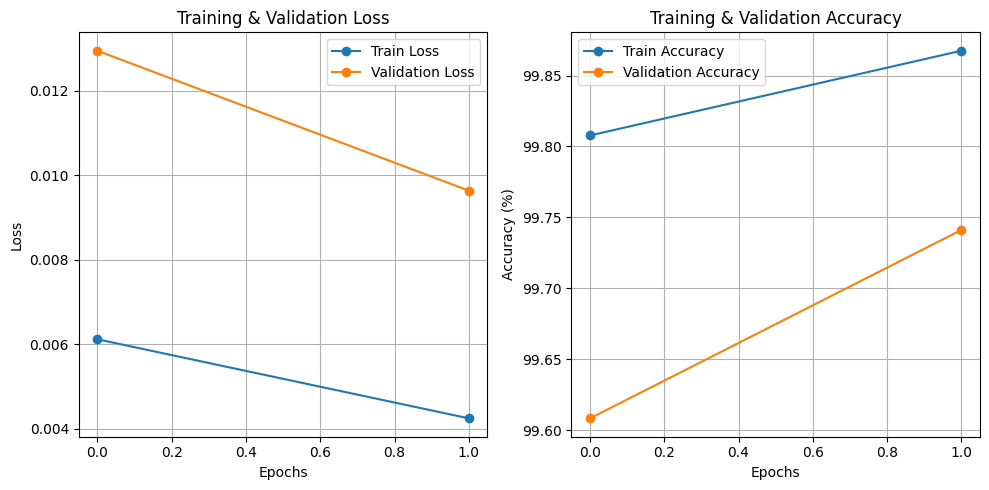

In [ ]:
file_path = "/content/drive/My Drive/Dataset/BanglaASRStuff/Preprocessed_BanglaASR_other/training_loss_accuracy_data.npy"
data = np.load(file_path, allow_pickle=True).item()

train_losses = data["train_losses"]
val_losses = data["val_losses"]
train_accuracies = data["train_accuracies"]
val_accuracies = data["val_accuracies"]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss", marker="o")
plt.plot(val_losses, label="Validation Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy", marker="o")
plt.plot(val_accuracies, label="Validation Accuracy", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#Model Evaluation

In [ ]:
#load pretrained model
save_path = "/content/drive/MyDrive/Dataset/Models/Preprocessed_BanglaASR/checkpoint_bangla_asr.pth"

model_path = "bangla-speech-processing/BanglaASR"
processor = WhisperProcessor.from_pretrained(model_path)
model = WhisperForConditionalGeneration.from_pretrained(model_path)


checkpoint = torch.load(save_path, map_location=device)


model.load_state_dict(checkpoint['model_state_dict'])

model.to(device)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import torch
import numpy as np
from torch.amp import autocast

save_eval_loss_accuracy_path = "/content/drive/My Drive/Dataset/BanglaASRStuff/Preprocessed_BanglaASR_other/eval_loss_accuracy_data.npy"

os.makedirs(os.path.dirname(save_eval_loss_accuracy_path), exist_ok=True)


eval_losses = []
eval_accuracies = []

# Evaluation loop
model.eval()
eval_loss = 0
correct_eval = 0
total_eval = 0


with torch.no_grad():
    for batch_idx, (input_features, labels) in enumerate(val_dataloader):
        input_features = input_features.to(device)
        labels = labels.to(device).to(torch.long)


        with autocast('cuda'):
            outputs = model(input_features=input_features, labels=labels)
            loss = outputs.loss

        eval_loss += loss.item()


        predicted = outputs.logits.argmax(dim=-1)
        correct_eval += (predicted == labels).sum().item()
        total_eval += labels.numel()


avg_eval_loss = eval_loss / len(val_dataloader)
eval_accuracy = 100 * correct_eval / total_eval

print(f"Evaluation Loss: {avg_eval_loss:.4f} | Evaluation Accuracy: {eval_accuracy:.2f}%")

# Save evaluation loss and accuracy data
np.save(save_eval_loss_accuracy_path, {
    "eval_losses": np.array([avg_eval_loss]),
    "eval_accuracies": np.array([eval_accuracy]),
})



Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Evaluation Loss: 0.0096 | Evaluation Accuracy: 99.74%


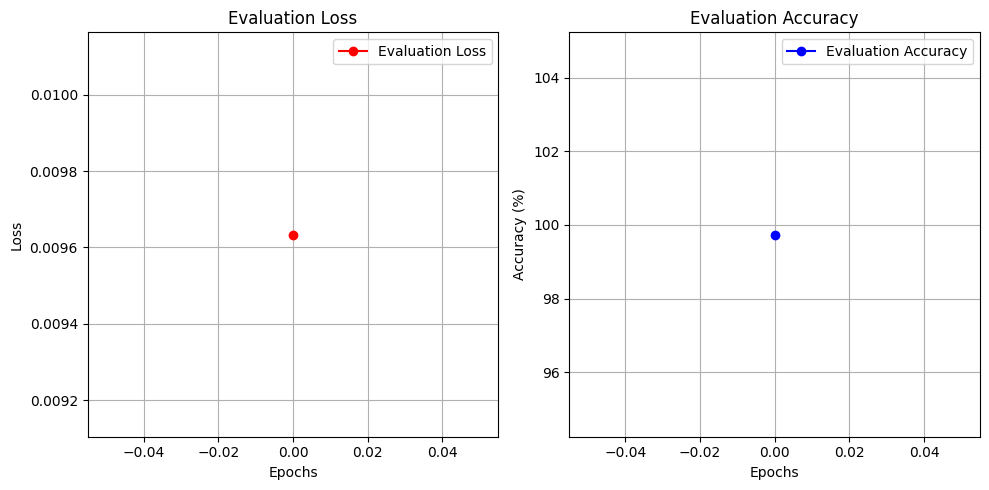

In [ ]:
file_path = "/content/drive/My Drive/Dataset/BanglaASRStuff/Preprocessed_BanglaASR_other/eval_loss_accuracy_data.npy"
data = np.load(file_path, allow_pickle=True).item()

eval_losses = data["eval_losses"]
eval_accuracies = data["eval_accuracies"]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(eval_losses, label="Evaluation Loss", marker="o", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Evaluation Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(eval_accuracies, label="Evaluation Accuracy", marker="o", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Evaluation Accuracy")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

#Inference


In [ ]:
model_path = "/content/drive/MyDrive/Dataset/Models/Preprocessed_BanglaASR/checkpoint_bangla_asr.pth"
hf_model = "bangla-speech-processing/BanglaASR"
test_audio_folder = "/content/drive/My Drive/Dataset/Split/test/Audio"
test_csv_path = "/content/drive/My Drive/Dataset/Split/test/test.csv"

test_df = pd.read_csv(test_csv_path)

In [ ]:
processor = WhisperProcessor.from_pretrained(hf_model)
model = WhisperForConditionalGeneration.from_pretrained(hf_model).to(device)

# Load trained weights
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        

In [ ]:
def transcribe_audio(audio_file):
    speech_array, sampling_rate = torchaudio.load(audio_file, format="mp3")
    speech_array = speech_array[0].numpy()
    speech_array = librosa.resample(np.asarray(speech_array), orig_sr=sampling_rate, target_sr=16000)

    input_features = processor(speech_array, sampling_rate=16000, return_tensors="pt").input_features.to(device)

    # Generate transcription
    with torch.no_grad():
        predicted_ids = model.generate(input_features)[0]

    # Decode prediction
    transcription = processor.decode(predicted_ids, skip_special_tokens=True)

    return transcription


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.4 MB/s eta 0:00:00


In [ ]:
from jiwer import wer, cer

wer_scores = []
cer_scores = []

for index, row in test_df.iterrows():
    audio_file = os.path.join(test_audio_folder, row["filename"])
    original_transcription = row["accented_bangla_speech"]

    if os.path.exists(audio_file):
        model_transcription = transcribe_audio(audio_file)

        wer_score = wer(original_transcription, model_transcription)
        cer_score = cer(original_transcription, model_transcription)

        wer_scores.append(wer_score)
        cer_scores.append(cer_score)

        print(f"Audio File Name: {row['filename']}")
        print(f"Original Transcription: {original_transcription}")
        print(f"Model Transcription: {model_transcription}")
        print(f"WER: {wer_score:.4f}, CER: {cer_score:.4f}")
        print("-" * 80)

average_wer = sum(wer_scores) / len(wer_scores)
average_cer = sum(cer_scores) / len(cer_scores)

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Average CER: {average_cer:.4f}")


Audio File Name: pitch_chittagong_501.wav
Original Transcription: আই আর বিষয়কান সাইডে রাহিয়েরে তারে সান্তনা দোন ফোরের
Model Transcription: আই আর বিষয়কান সাইডে রাহিয়েরে তারে সান্তনা দোন ফোরের
WER: 0.0000, CER: 0.0000
--------------------------------------------------------------------------------
Audio File Name: noise_chittagong_101.wav
Original Transcription: তোঁয়ারে চারা আঁর এক্কানাও গম ন লাগে
Model Transcription: তোঁয়ারে চারা আর এক্কানাও বম ন লাগে
WER: 0.2857, CER: 0.0571
--------------------------------------------------------------------------------
Audio File Name: chittagong_738.wav
Original Transcription: মেঠো ফতর দুইপাসদ্দি সবুজ ধান কেত
Model Transcription: মেঠো ফতর দুইপাসদ্দি সবুজ ধান কেত
WER: 0.0000, CER: 0.0000
--------------------------------------------------------------------------------
Audio File Name: stretch_chittagong_889.wav
Original Transcription: উঠানোর তুন হতা কইয়েরে উবা গিয়োয়
Model Transcription: উঠানর তুন হতা কইয়েরে উবা কি অয়
WER: 0.5000, CER: 0.1290
---------

In [ ]:
total_accuracy = (1 - average_wer) * 100

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Total Accuracy: {total_accuracy:.2f}%")


Average WER: 0.1924
Total Accuracy: 80.76%


In [ ]:
total_accuracy = (1 - average_cer) * 100

print(f"\nAverage CER: {average_cer:.4f}")
print(f"Total Accuracy: {total_accuracy:.2f}%")


Average CER: 0.0778
Total Accuracy: 92.22%


In [ ]:
from jiwer import wer

audio_folder = "/content/drive/MyDrive/Dataset/Split/test/Audio"
csv_file = "/content/drive/MyDrive/Dataset/Split/test/test.csv"

df = pd.read_csv(csv_file)

audio_filenames = df['filename'].tolist()
ground_truths = df['accented_bangla_speech'].tolist()

num_beams = 7  # Start with a higher value than before
length_penalty = 0.7  # Encourage shorter transcriptions
early_stopping = True

total_wer = 0
total_files = 0
total_acc = 0

for file in os.listdir(audio_folder):
    if file.endswith(".wav"):

        if file in audio_filenames:
            index = audio_filenames.index(file)
            ground_truth = ground_truths[index]

            audio_path = os.path.join(audio_folder, file)
            audio, sr = librosa.load(audio_path, sr=16000)
            input_features = processor(audio, return_tensors="pt", sampling_rate=16000).input_features.to(device)

            with torch.no_grad():
                predicted_ids = model.generate(
                    input_features,
                    num_beams=num_beams,
                    length_penalty=length_penalty,
                    early_stopping=early_stopping,
                )

            transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]

            print(f"{file} -> {transcription}")

            error = wer(ground_truth, transcription)
            accuracy = (1 - min(error, 1)) * 100

            print(f"  WER: {error:.4f}, Accuracy: {accuracy:.2f}%")
            total_acc += accuracy
            total_wer += error
            total_files += 1

average_wer = total_wer / total_files if total_files else 0
total_accuracy = total_acc / total_files if total_files else 0

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Total Accuracy: {total_accuracy:.2f}%")

pitch_chittagong_501.wav -> আই আর বিষয়কান সাইডে রাহিয়েরে তারে সান্তনা দোন ফোরের
  WER: 0.0000, Accuracy: 100.00%
stretch_chittagong_675.wav -> সেইদিন আসিল বাংলাদেশের ক্রিকেন হেলা
  WER: 0.4000, Accuracy: 60.00%
noise_noakhali_441.wav -> তুই আর লাই কোনো সুন্দর উপিকার ক্যিনতে হ্যায়েরবি?
  WER: 0.2500, Accuracy: 75.00%
stretch_noakhali_162.wav -> যত কষ্ট অক বেক মানি লইয়াম হিয়ার হরেও তোরে বালো বাইস্সাম
  WER: 0.0000, Accuracy: 100.00%
pitch_noakhali_580.wav -> হোদা এক গারি হানি অইলেও দুইদিন চলি যাইত
  WER: 0.2500, Accuracy: 75.00%
noise_chittagong_565.wav -> সে স্কুলত নো যায় হোন দিন
  WER: 0.0000, Accuracy: 100.00%
chittagong_899.wav -> ভাত রান্নার বাডি ইবা শক্ত গরি ডাকি রাহা লাইবো
  WER: 0.1111, Accuracy: 88.89%
noakhali_47.wav -> হেতে স্কুলো যাই বনদুগোর লগে গল্ফ করে
  WER: 0.0000, Accuracy: 100.00%
pitch_chittagong_859.wav -> বেশী ফানি দিয়েরে কাছ মরি দেহেবো না?
  WER: 0.6250, Accuracy: 37.50%
noise_chittagong_101.wav -> তোঁয়ারে চারা আর এক্কানাও বম ন লাগে
  WER: 0.2857, Accuracy: 71.43%

In [ ]:
total_accuracy = (1 - average_wer) * 100

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Total Accuracy: {total_accuracy:.2f}%")


Average WER: 0.1779
Total Accuracy: 82.21%


#Save Final Model

In [ ]:
#load pretrained model
save_path = "/content/drive/MyDrive/Dataset/Models/Preprocessed_BanglaASR/checkpoint_bangla_asr.pth"

model_path = "bangla-speech-processing/BanglaASR"
processor = WhisperProcessor.from_pretrained(model_path)
model = WhisperForConditionalGeneration.from_pretrained(model_path)

checkpoint = torch.load(save_path, map_location=device)

model.load_state_dict(checkpoint['model_state_dict'])

model.to(device)

print("Model loaded successfully!")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

Model loaded successfully!


In [ ]:
final_model_path = "/content/drive/My Drive/Dataset/Models/Preprocessed_BanglaASR/final_bangla_asr.pt"

os.makedirs(os.path.dirname(final_model_path), exist_ok=True)

In [ ]:
torch.save(model.state_dict(), final_model_path)

In [ ]:
model.load_state_dict(torch.load(final_model_path))
model.eval()


WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        

#Test with final model (experiment)

In [ ]:
final_model_path = "/content/drive/My Drive/Dataset/Models/Preprocessed_BanglaASR/final_bangla_asr.pt"

model.load_state_dict(torch.load(final_model_path))
model.eval()

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        

In [ ]:
hf_model = "bangla-speech-processing/BanglaASR"
processor = WhisperProcessor.from_pretrained(hf_model)

In [ ]:
# Function to transcribe audio
def transcribe_audio(audio_file):
    speech_array, sampling_rate = torchaudio.load(audio_file, format="wav")
    speech_array = speech_array[0].numpy()
    speech_array = librosa.resample(np.asarray(speech_array), orig_sr=sampling_rate, target_sr=16000)

    input_features = processor(speech_array, sampling_rate=16000, return_tensors="pt").input_features.to(device)

    # Generate transcription
    with torch.no_grad():
        predicted_ids = model.generate(input_features)[0]

    # Decode prediction
    transcription = processor.decode(predicted_ids, skip_special_tokens=True)

    return transcription


In [ ]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.3 MB/s eta 0:00:00


In [ ]:
test_audio_folder = "/content/drive/My Drive/Dataset/Split/test/Audio"
test_csv_path = "/content/drive/My Drive/Dataset/Split/test/test.csv"

test_df = pd.read_csv(test_csv_path)

In [ ]:
from jiwer import wer, cer

wer_scores = []
cer_scores = []

for index, row in test_df.iterrows():
    audio_file = os.path.join(test_audio_folder, row["filename"])
    original_transcription = row["accented_bangla_speech"]

    if os.path.exists(audio_file):
        model_transcription = transcribe_audio(audio_file)

        wer_score = wer(original_transcription, model_transcription)
        cer_score = cer(original_transcription, model_transcription)

        wer_scores.append(wer_score)
        cer_scores.append(cer_score)

        print(f"Audio File Name: {row['filename']}")
        print(f"Original Transcription: {original_transcription}")
        print(f"Model Transcription: {model_transcription}")
        print(f"WER: {wer_score:.4f}, CER: {cer_score:.4f}")
        print("-" * 80)

average_wer = sum(wer_scores) / len(wer_scores)
average_cer = sum(cer_scores) / len(cer_scores)

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Average CER: {average_cer:.4f}")


Audio File Name: pitch_chittagong_501.wav
Original Transcription: আই আর বিষয়কান সাইডে রাহিয়েরে তারে সান্তনা দোন ফোরের
Model Transcription: আই আর বিষয়কান সাইডে রাহিয়েরে তারে সান্তনা দোন ফোরের
WER: 0.0000, CER: 0.0000
--------------------------------------------------------------------------------
Audio File Name: noise_chittagong_101.wav
Original Transcription: তোঁয়ারে চারা আঁর এক্কানাও গম ন লাগে
Model Transcription: তোঁয়ারে চারা আর এক্কানাও বম ন লাগে
WER: 0.2857, CER: 0.0571
--------------------------------------------------------------------------------
Audio File Name: chittagong_738.wav
Original Transcription: মেঠো ফতর দুইপাসদ্দি সবুজ ধান কেত
Model Transcription: মেঠো ফতর দুইপাসদ্দি সবুজ ধান কেত
WER: 0.0000, CER: 0.0000
--------------------------------------------------------------------------------
Audio File Name: stretch_chittagong_889.wav
Original Transcription: উঠানোর তুন হতা কইয়েরে উবা গিয়োয়
Model Transcription: উঠানর তুন হতা কইয়েরে উবা কি অয়
WER: 0.5000, CER: 0.1290
---------

In [ ]:
total_accuracy = (1 - average_wer) * 100

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Total Accuracy: {total_accuracy:.2f}%")


Average WER: 0.1924
Total Accuracy: 80.76%


In [ ]:
total_accuracy = (1 - average_cer) * 100

print(f"\nAverage CER: {average_cer:.4f}")
print(f"Total Accuracy: {total_accuracy:.2f}%")


Average CER: 0.0778
Total Accuracy: 92.22%


In [ ]:
from jiwer import wer

audio_folder = "/content/drive/MyDrive/Dataset/Split/test/Audio"
csv_file = "/content/drive/MyDrive/Dataset/Split/test/test.csv"

df = pd.read_csv(csv_file)

audio_filenames = df['filename'].tolist()
ground_truths = df['accented_bangla_speech'].tolist()

num_beams = 7
length_penalty = 0.7
early_stopping = True

total_wer = 0
total_files = 0
total_acc = 0

for file in os.listdir(audio_folder):
    if file.endswith(".wav"):

        if file in audio_filenames:
            index = audio_filenames.index(file)
            ground_truth = ground_truths[index]

            audio_path = os.path.join(audio_folder, file)
            audio, sr = librosa.load(audio_path, sr=16000)
            input_features = processor(audio, return_tensors="pt", sampling_rate=16000).input_features.to(device)

            with torch.no_grad():
                predicted_ids = model.generate(
                    input_features,
                    num_beams=num_beams,
                    length_penalty=length_penalty,
                    early_stopping=early_stopping,
                )

            transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]

            print(f"{file} -> {transcription}")

            error = wer(ground_truth, transcription)
            accuracy = (1 - min(error, 1)) * 100

            print(f"  WER: {error:.4f}, Accuracy: {accuracy:.2f}%")
            total_acc += accuracy
            total_wer += error
            total_files += 1

average_wer = total_wer / total_files if total_files else 0
total_accuracy = total_acc / total_files if total_files else 0

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Total Accuracy: {total_accuracy:.2f}%")

pitch_chittagong_501.wav -> আই আর বিষয়কান সাইডে রাহিয়েরে তারে সান্তনা দোন ফোরের
  WER: 0.0000, Accuracy: 100.00%
stretch_chittagong_675.wav -> সেইদিন আসিল বাংলাদেশের ক্রিকেন হেলা
  WER: 0.4000, Accuracy: 60.00%
noise_noakhali_441.wav -> তুই আর লাই কোনো সুন্দর উপিকার ক্যিনতে হ্যায়েরবি?
  WER: 0.2500, Accuracy: 75.00%
stretch_noakhali_162.wav -> যত কষ্ট অক বেক মানি লইয়াম হিয়ার হরেও তোরে বালো বাইস্সাম
  WER: 0.0000, Accuracy: 100.00%
pitch_noakhali_580.wav -> হোদা এক গারি হানি অইলেও দুইদিন চলি যাইত
  WER: 0.2500, Accuracy: 75.00%
noise_chittagong_565.wav -> সে স্কুলত নো যায় হোন দিন
  WER: 0.0000, Accuracy: 100.00%
chittagong_899.wav -> ভাত রান্নার বাডি ইবা শক্ত গরি ডাকি রাহা লাইবো
  WER: 0.1111, Accuracy: 88.89%
noakhali_47.wav -> হেতে স্কুলো যাই বনদুগোর লগে গল্ফ করে
  WER: 0.0000, Accuracy: 100.00%
pitch_chittagong_859.wav -> বেশী ফানি দিয়েরে কাছ মরি দেহেবো না?
  WER: 0.6250, Accuracy: 37.50%
noise_chittagong_101.wav -> তোঁয়ারে চারা আর এক্কানাও বম ন লাগে
  WER: 0.2857, Accuracy: 71.43%

In [ ]:
total_accuracy = (1 - average_wer) * 100

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Total Accuracy: {total_accuracy:.2f}%")


Average WER: 0.1779
Total Accuracy: 82.21%


In [ ]:
from jiwer import wer, cer  # <-- Import CER
import os
import pandas as pd
import librosa
import torch

audio_folder = "/content/drive/MyDrive/Dataset/Split/test/Audio"
csv_file = "/content/drive/MyDrive/Dataset/Split/test/test.csv"

df = pd.read_csv(csv_file)

audio_filenames = df['filename'].tolist()
ground_truths = df['accented_bangla_speech'].tolist()

num_beams = 7
length_penalty = 0.7
early_stopping = True

total_wer = 0
total_cer = 0
total_files = 0
total_acc = 0

for file in os.listdir(audio_folder):
    if file.endswith(".wav"):
        if file in audio_filenames:
            index = audio_filenames.index(file)
            ground_truth = ground_truths[index]

            audio_path = os.path.join(audio_folder, file)
            audio, sr = librosa.load(audio_path, sr=16000)
            input_features = processor(audio, return_tensors="pt", sampling_rate=16000).input_features.to(device)

            with torch.no_grad():
                predicted_ids = model.generate(
                    input_features,
                    num_beams=num_beams,
                    length_penalty=length_penalty,
                    early_stopping=early_stopping,
                )

            transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]

            print(f"{file} -> {transcription}")

            wer_error = wer(ground_truth, transcription)
            cer_error = cer(ground_truth, transcription)
            accuracy = (1 - min(wer_error, 1)) * 100

            print(f"  WER: {wer_error:.4f}, CER: {cer_error:.4f}, Accuracy: {accuracy:.2f}%")
            total_wer += wer_error
            total_cer += cer_error
            total_acc += accuracy
            total_files += 1

average_wer = total_wer / total_files if total_files else 0
average_cer = total_cer / total_files if total_files else 0
average_accuracy = total_acc / total_files if total_files else 0

print(f"\nAverage WER: {average_wer:.4f}")
print(f"Average CER: {average_cer:.4f}")
print(f"Average Accuracy: {average_accuracy:.2f}%")


Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


pitch_chittagong_501.wav -> আই আর বিষয়কান সাইডে রাহিয়েরে তারে সান্তনা দোন ফোরের
  WER: 0.0000, CER: 0.0000, Accuracy: 100.00%
stretch_chittagong_675.wav -> সেইদিন আসিল বাংলাদেশের ক্রিকেন হেলা
  WER: 0.4000, CER: 0.0588, Accuracy: 60.00%
noise_noakhali_441.wav -> তুই আর লাই কোনো সুন্দর উপিকার ক্যিনতে হ্যায়েরবি?
  WER: 0.2500, CER: 0.0870, Accuracy: 75.00%
stretch_noakhali_162.wav -> যত কষ্ট অক বেক মানি লইয়াম হিয়ার হরেও তোরে বালো বাইস্সাম
  WER: 0.0000, CER: 0.0000, Accuracy: 100.00%
pitch_noakhali_580.wav -> হোদা এক গারি হানি অইলেও দুইদিন চলি যাইত
  WER: 0.2500, CER: 0.0750, Accuracy: 75.00%
noise_chittagong_565.wav -> সে স্কুলত নো যায় হোন দিন
  WER: 0.0000, CER: 0.0000, Accuracy: 100.00%
chittagong_899.wav -> ভাত রান্নার বাডি ইবা শক্ত গরি ডাকি রাহা লাইবো
  WER: 0.1111, CER: 0.0435, Accuracy: 88.89%
noakhali_47.wav -> হেতে স্কুলো যাই বনদুগোর লগে গল্ফ করে
  WER: 0.0000, CER: 0.0000, Accuracy: 100.00%
pitch_chittagong_859.wav -> বেশী ফানি দিয়েরে কাছ মরি দেহেবো না?
  WER: 0.6250, CER: 0.